For time series is better to adjust the size of the plots with a width higher than the height:

In [1]:
options(repr.plot.width=10, repr.plot.height=5) # Size of the plots

In this tutorial we will not use ggplot2 to plot the data. This is because time series need the ggfortify package to use ggplot2 and time series. I recommend you to download it for nicer visualizations in the future. For more info: http://www.sthda.com/english/articles/32-r-graphics-essentials/128-plot-time-series-data-using-ggplot/

Install the library "forecast". You can find it in the Anaconda Environment, under the Uninstalled packages, the "r-forecast" 

In [2]:
library(forecast)
library(tseries)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


In [3]:
climate <- read.csv("climate.csv")
str(climate)

'data.frame':	1644 obs. of  2 variables:
 $ Date: Factor w/ 1644 levels "1880-01-06","1880-02-06",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Mean: num  0.0009 -0.1229 -0.1357 -0.0499 -0.0738 ...


Column Date is stored as Factor, when it should actually be a date:

In [4]:
climate$Date <- as.Date(climate$Date, format="%Y-%m-%d")
str(climate)

'data.frame':	1644 obs. of  2 variables:
 $ Date: Date, format: "1880-01-06" "1880-02-06" ...
 $ Mean: num  0.0009 -0.1229 -0.1357 -0.0499 -0.0738 ...


In [5]:
climate

Date,Mean
1880-01-06,0.0009
1880-02-06,-0.1229
1880-03-06,-0.1357
1880-04-06,-0.0499
1880-05-06,-0.0738
1880-06-06,-0.1692
1880-07-06,-0.1491
1880-08-06,-0.0725
1880-09-06,-0.0817
1880-10-06,-0.1786


We will create a timeseries, where we have to specify the start and the end date and the frequency (12 months)

In [6]:
climate.ts <- ts(climate$Mean, st=c(1880,1), end=c(2016,12), fr=12)

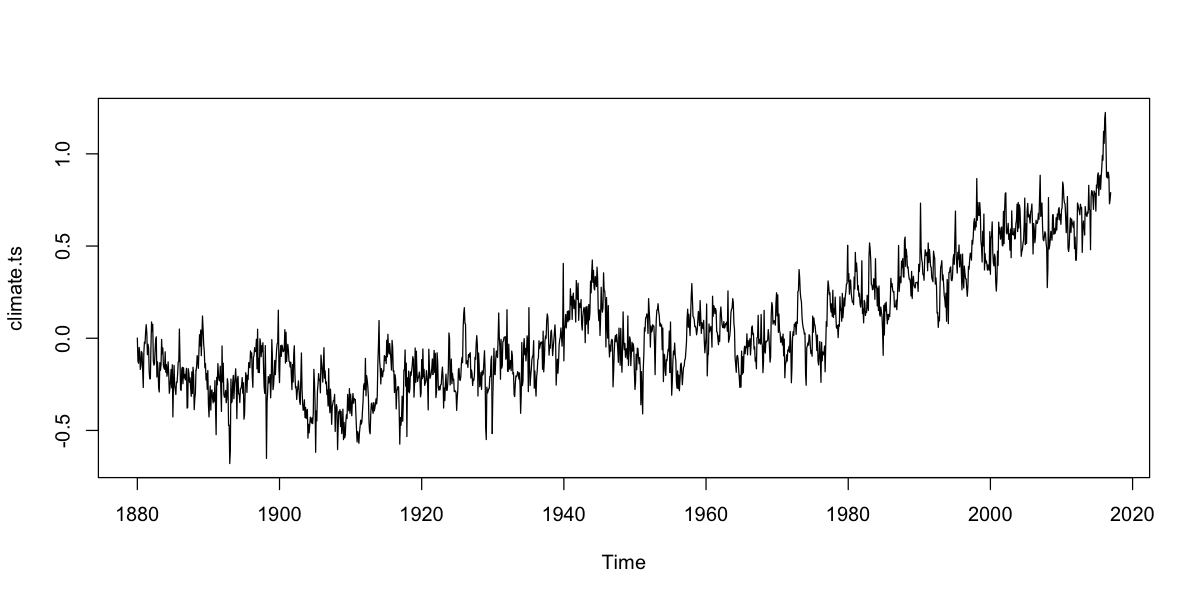

In [7]:
plot(climate.ts)

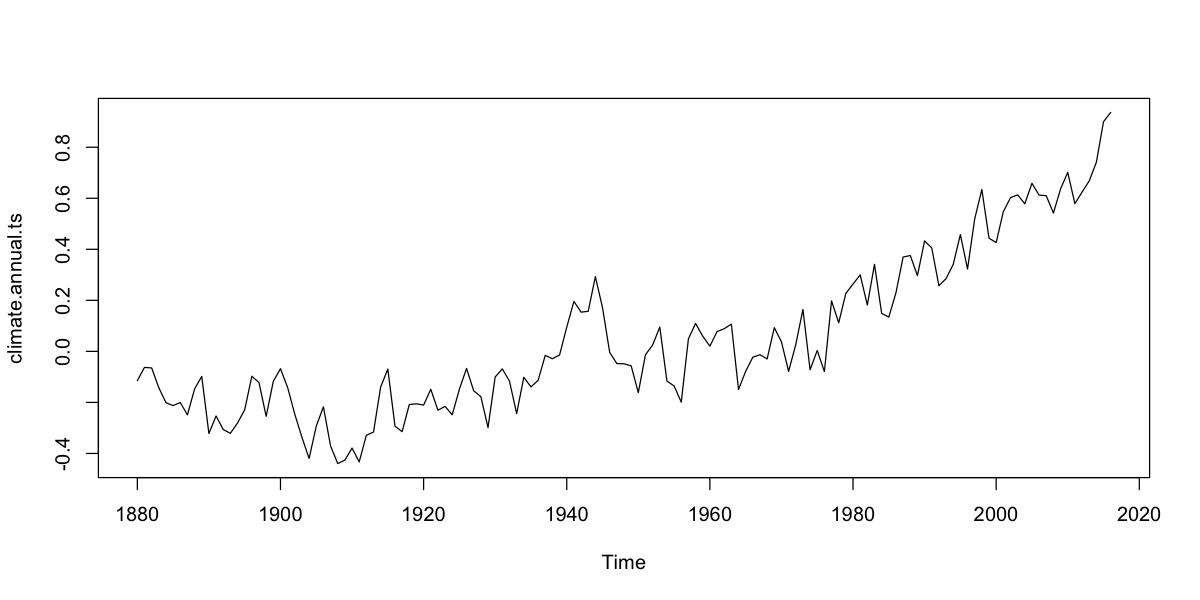

In [20]:
climate.annual.ts <- aggregate(climate.ts, FUN=mean)
plot(climate.annual.ts)

We can select a period of interest with the function "window"

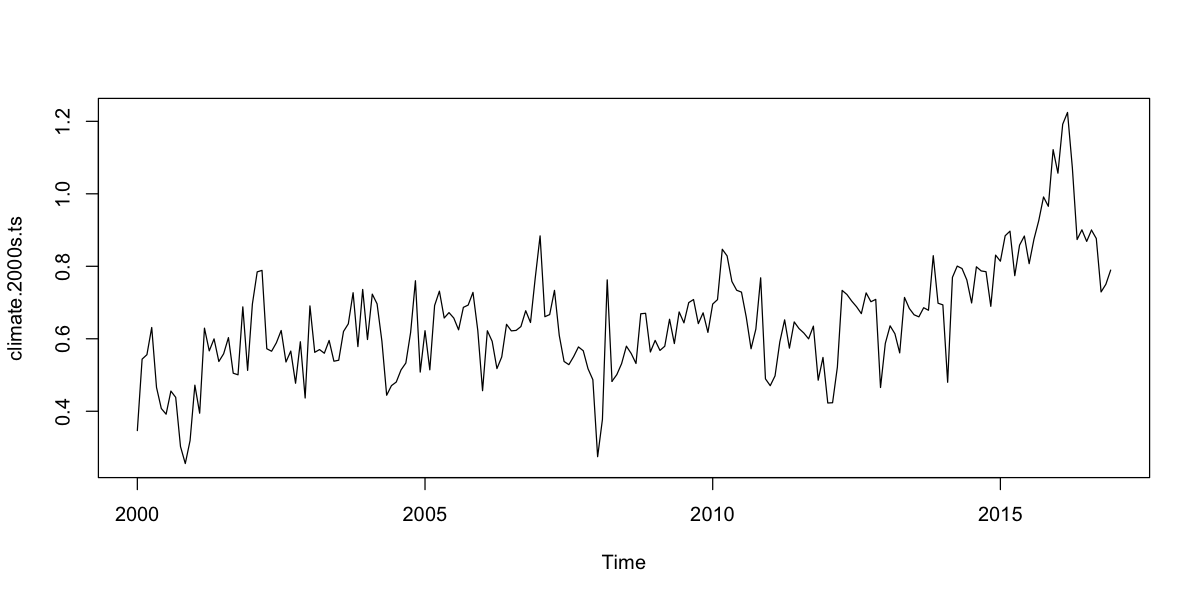

In [21]:
climate.2000s.ts <- window(climate.ts, start=c(2000, 1), end=c(2016,12))
plot(climate.2000s.ts)

# <font color='#FD7C6E'> Time Series Decomposition </font> 

Some datasets are already preloaded in R. For example, a time series of the Air passangers in the US can be loaded easily

In [23]:
data("AirPassengers")
passengers.ts <- AirPassengers

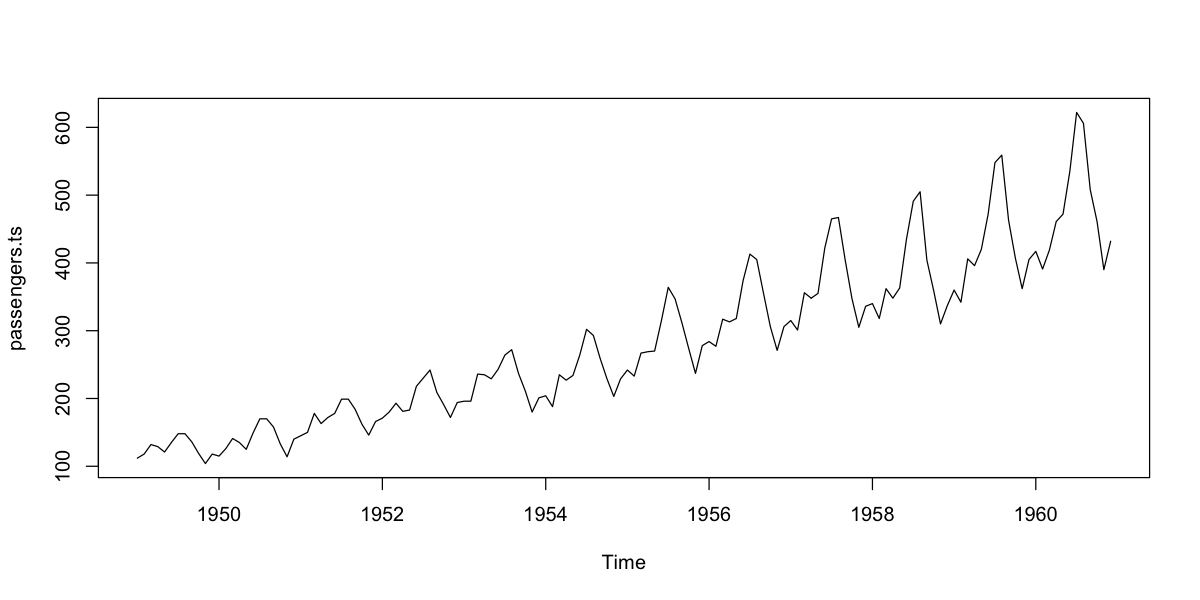

In [25]:
plot(passengers.ts)

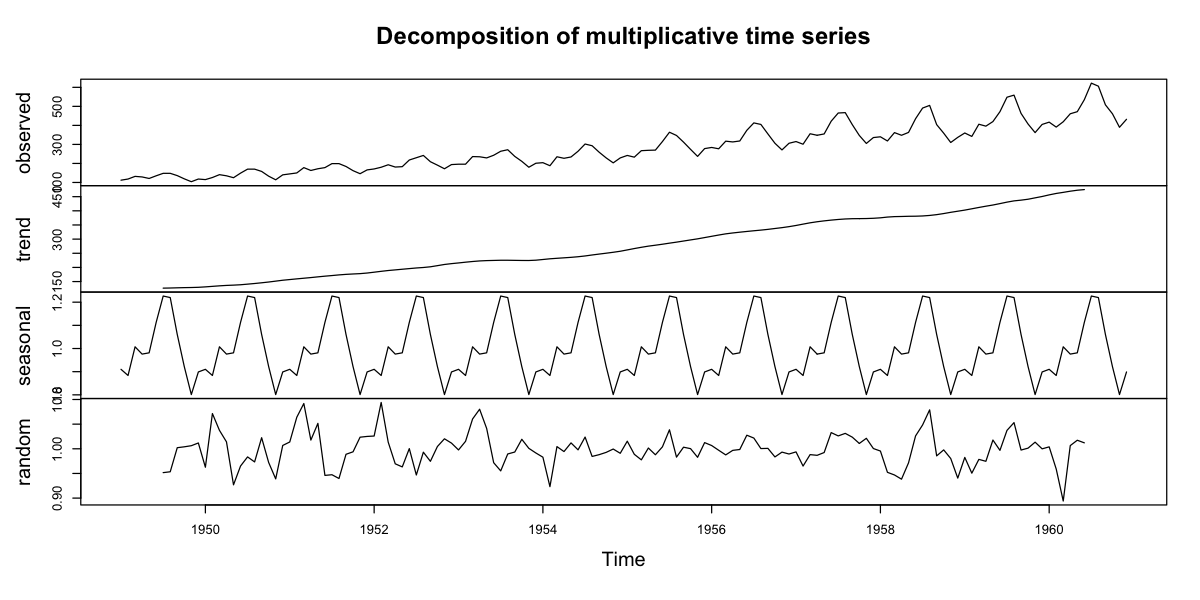

In [32]:
ts_decom <- decompose(passengers.ts, type = "multiplicative")
plot(ts_decom)

Let's test for stationarity on the random error:

In [52]:
ts.random <- na.remove(ts_decom$random)
adf.test(ts.random)

Warning message in adf.test(ts.random):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  ts.random
Dickey-Fuller = -6.4236, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


# <font color='#FD7C6E'> Forecasting </font> 

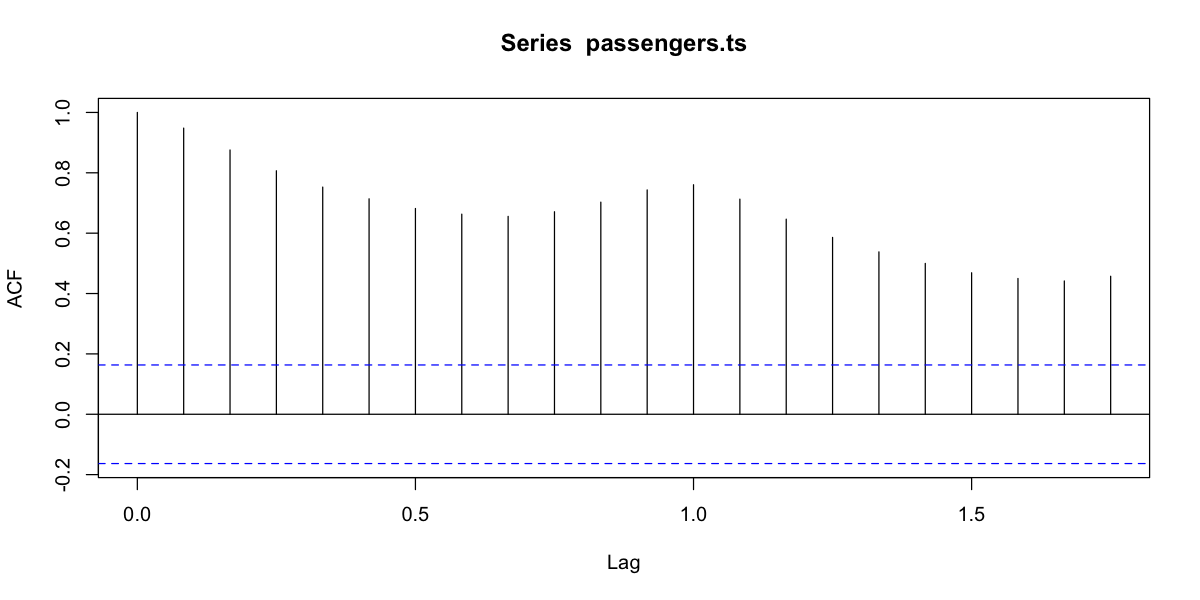

In [54]:
acf(passengers.ts)

For forecasting we need the ACF plot on the stationary time series

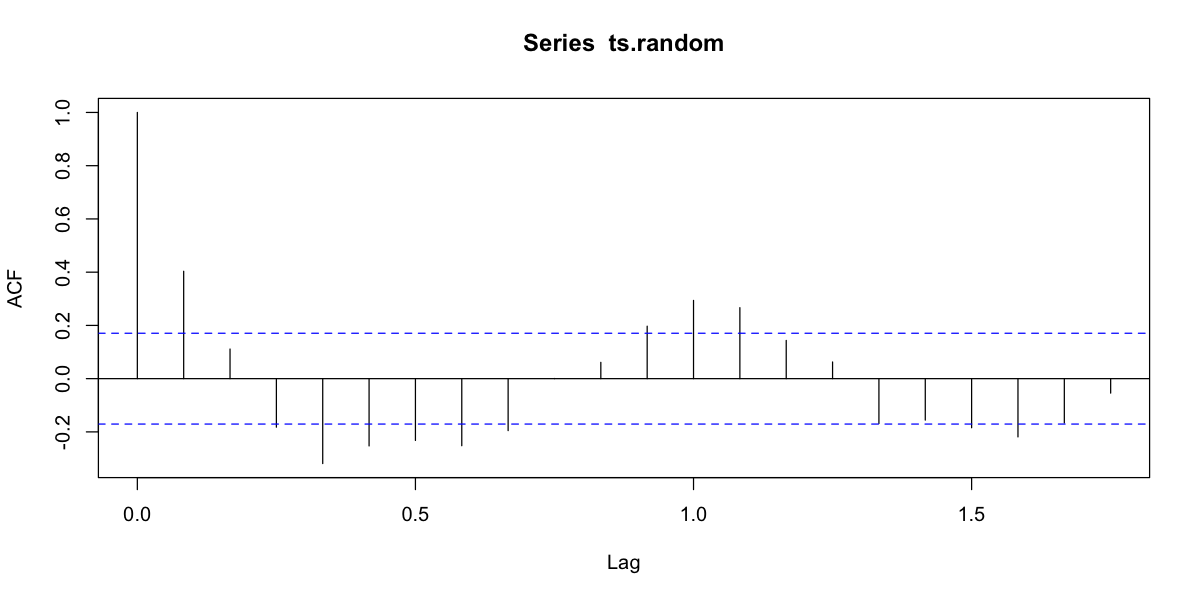

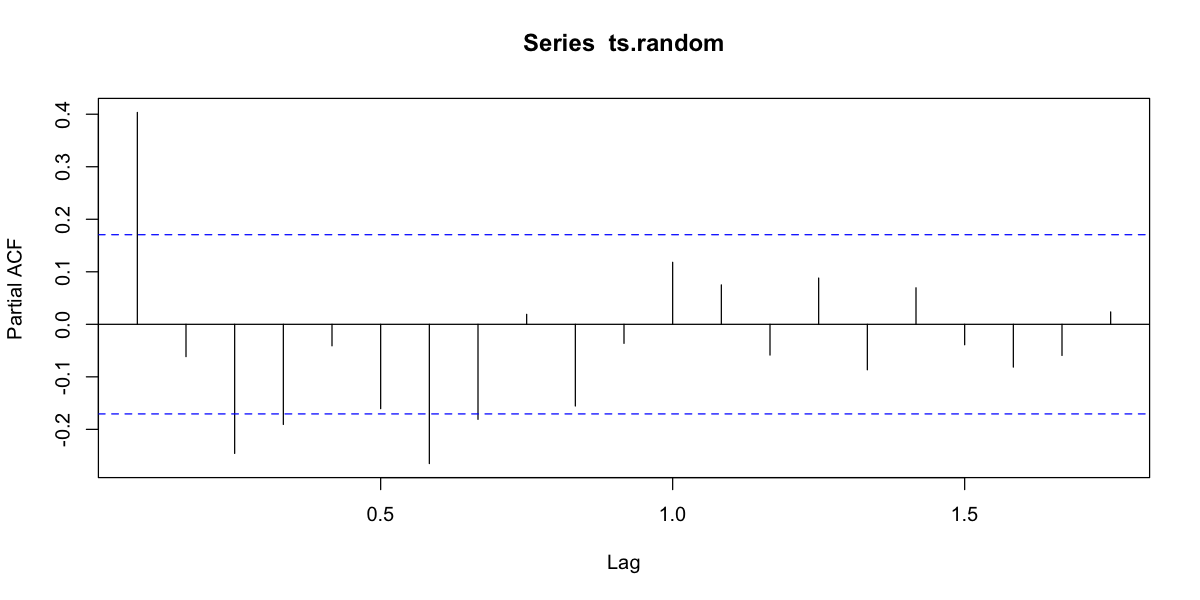

In [55]:
acf(ts.random)
pacf(ts.random)

In [91]:
arima.model <- Arima(passengers.ts, order = c(2, 1, 2))
arima.model

Series: passengers.ts 
ARIMA(2,1,2) 

Coefficients:
         ar1     ar2      ma1      ma2
      0.3517  0.1887  -0.0806  -0.7218
s.e.  0.1543  0.1501   0.1216   0.1143

sigma^2 estimated as 912.8:  log likelihood=-688.7
AIC=1387.41   AICc=1387.85   BIC=1402.22

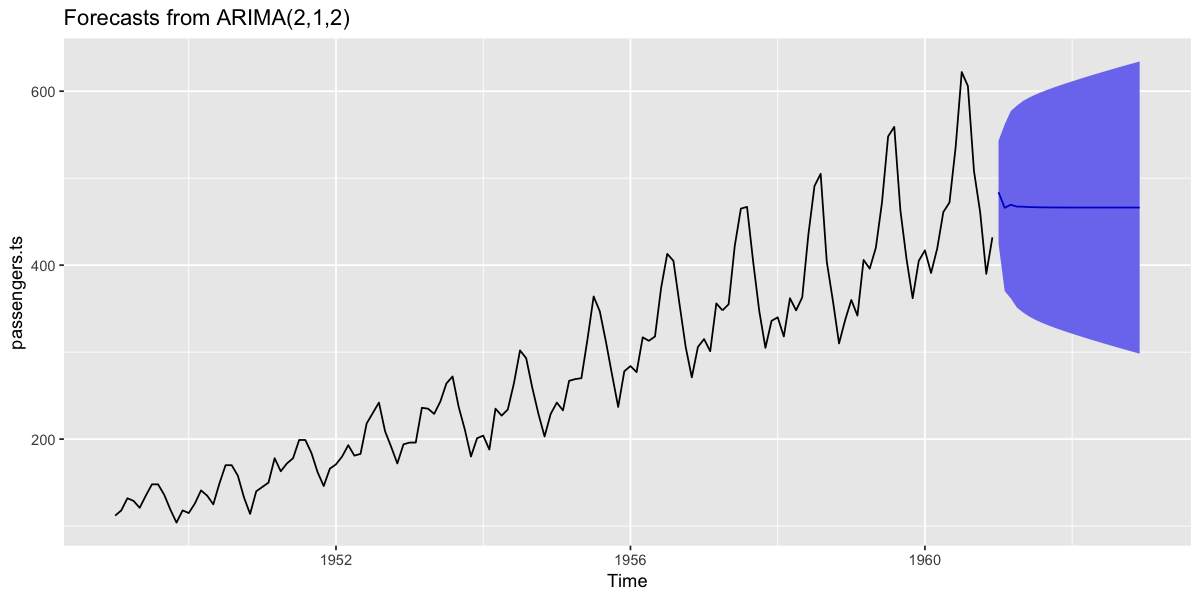

In [92]:
fit <- forecast(arima.model, level = c(95))
autoplot(fit)

Arima can handle data with a trend, it does not support time series with a seasonal component. We need to implement SARIMA (seasonal ARIMA)

In [72]:
arima.model <- auto.arima(passengers.ts)
arima.model

Series: passengers.ts 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 estimated as 132.3:  log likelihood=-504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

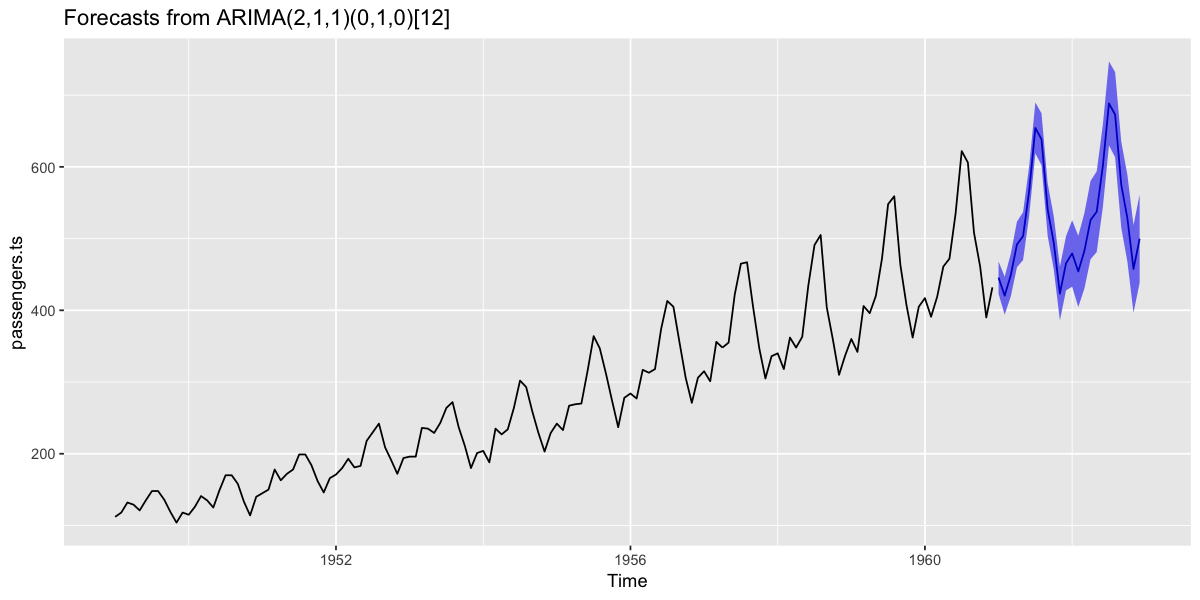

In [73]:
fit <- forecast(arima.model, level = c(95))
autoplot(fit)

## Activity 1: Create an ARIMA model for the climate data and make a forecasting

In [94]:
arima.model <- auto.arima(climate.ts)
arima.model

Series: climate.ts 
ARIMA(2,1,2) with drift 

Coefficients:
         ar1      ar2      ma1     ma2  drift
      1.0129  -0.1078  -1.4915  0.5025  6e-04
s.e.  0.0833   0.0620   0.0775  0.0743  3e-04

sigma^2 estimated as 0.008779:  log likelihood=1560.82
AIC=-3109.65   AICc=-3109.59   BIC=-3077.22

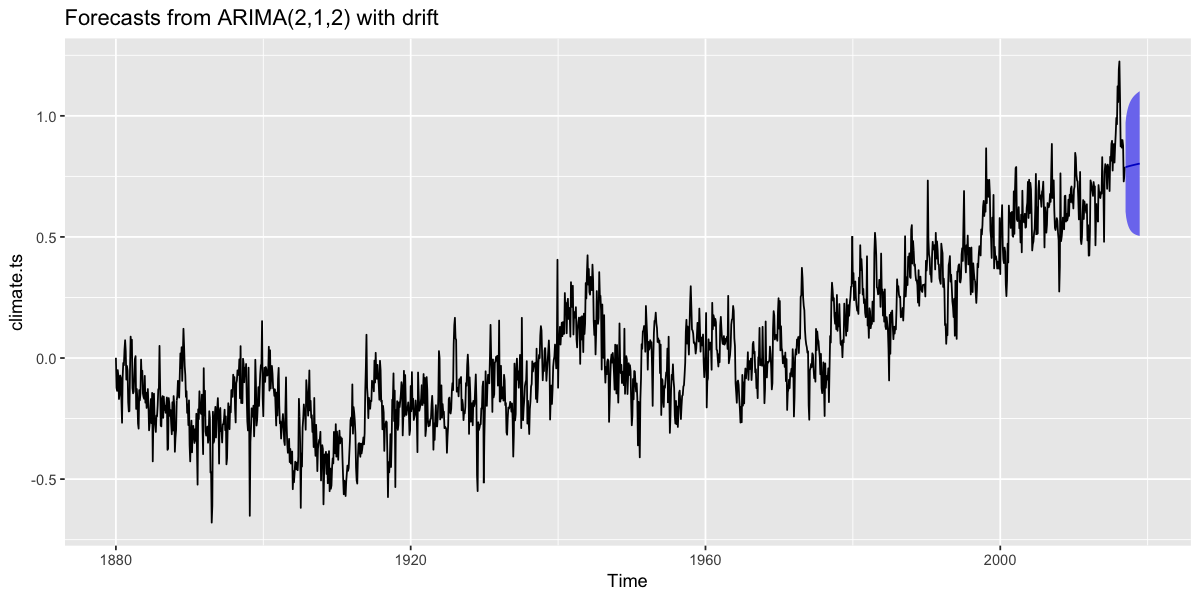

In [95]:
fit <- forecast(arima.model, level = c(95))
autoplot(fit)

## Ice Melting

## Activity 2: Load the sea_ice data

In [97]:
ice.df <- read.csv("sea_ice.csv")

In [99]:
ice.df

Time,Arctic,Antarctica
1990M01,12.72,3.27
1990M02,13.33,2.15
1990M03,13.44,2.71
1990M04,12.16,5.10
1990M05,10.84,7.37
1990M06,9.12,10.26
1990M07,6.44,12.17
1990M08,4.92,13.95
1990M09,4.50,14.30
1990M10,6.67,13.71


## Activity 3:  Create a time series for the sea ice in the Antarctic and plot it

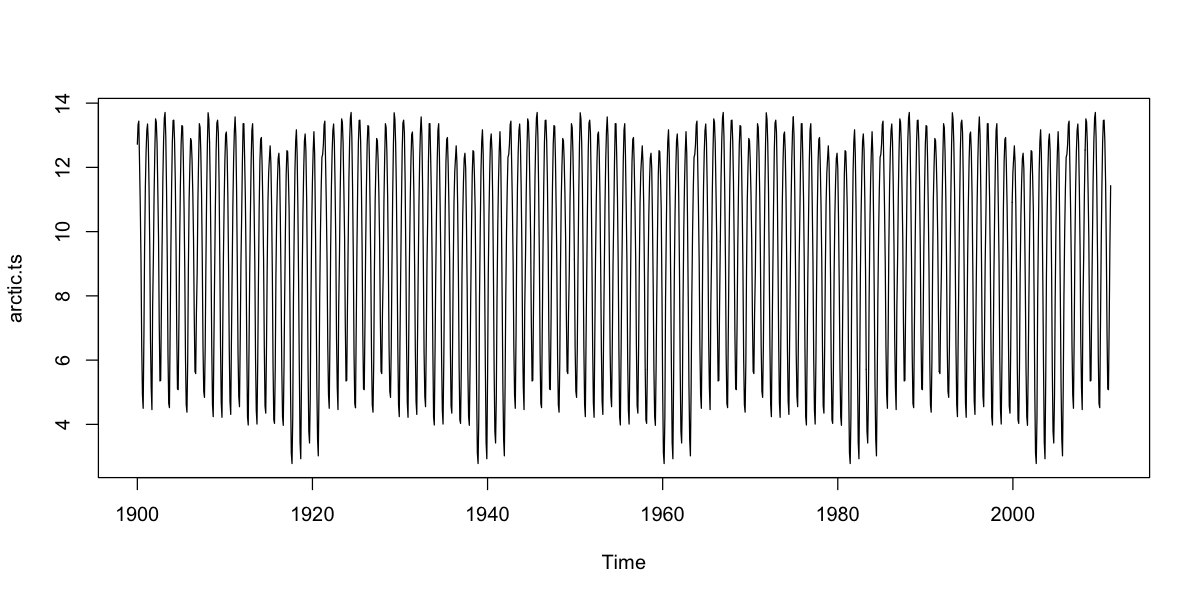

In [111]:
antarctic.ts <- ts(ice.df$Antarctic, st=c(1900,1), end=c(2011,3), fr=12)
plot(arctic.ts)

## Activity 4: Aggregate the time series per year and plot it

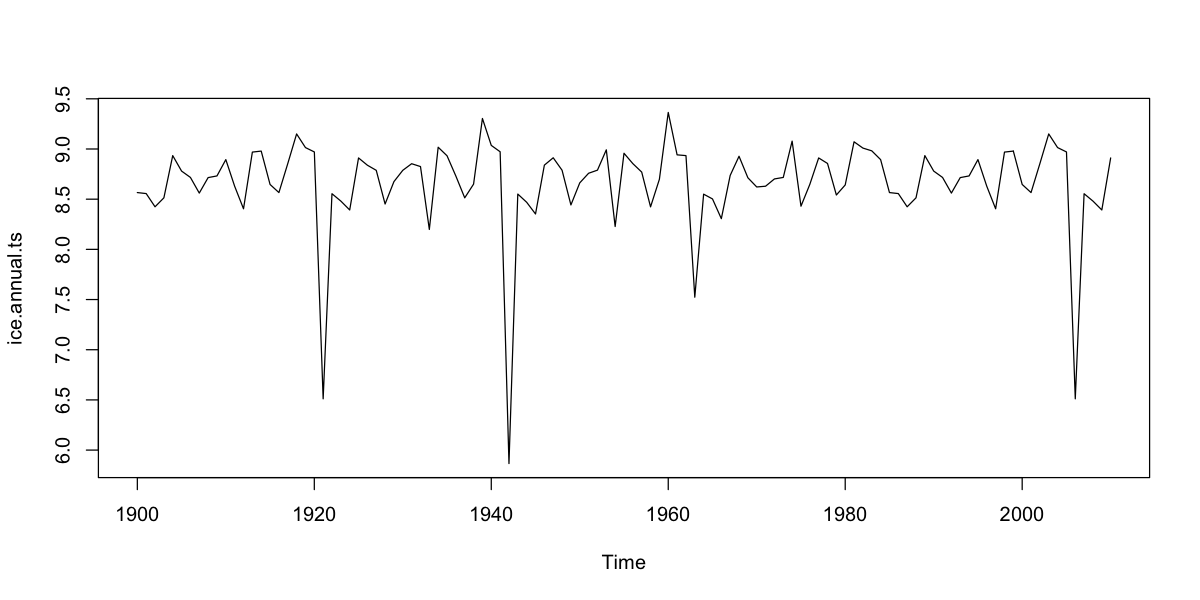

In [114]:
ice.annual.ts <- aggregate(antarctic.ts, FUN=mean)
plot(ice.annual.ts)

## Activity 5: Create an ARIMA model from the monthly data

In [118]:
arima.model <- auto.arima(antarctic.ts)
fit <- forecast(arima.model, level = c(95))
autoplot(fit)